<a href="https://colab.research.google.com/github/ruchikajangid/Appliance-Energy-Prediction/blob/master/ruchika_jangir_met16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from sklearn import metrics
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
from textblob import TextBlob
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


**Training and Testing Data**

In [0]:
train= pd.read_excel('tag_identification_dataset.xlsx')

In [0]:
test= pd.read_excel('test.xlsx')

In [4]:
len(test)

34

In [5]:
len(train)

107

In [6]:
train.head()

,post_id,question,user_stage,tag
0,1,"Alhamdulilh, blessed with beautiful baby girl...",pregnant,Announcements&Celebrations
1,2,Breastfeeding mother ko chai pini chaiye usse ...,mother,General Baby
2,3,Hii all as I am preganent with twins on coming...,pregnant,General Pregnancy
3,4,Mujhy mild cramp sa feeling Hai lower main aur...,pregnant,General Pregnancy
4,5,Can I drink lion dates syrup,pregnant,Diet&Nutrition


In [7]:
test.head()

,post_id,question,user_stage,tag
0,75,Unable to upload my profile pic,pregnant,NaN
1,90,I dont have any problm in morning whole day bu...,pregnant,NaN
2,94,Hi I am not conformed the pregnancy but I am e...,pregnant,NaN
3,102,Best fresh fruit juice for six months old baby,mother,NaN
4,108,Which storage bag is good to store breast milk...,mother,NaN


**Data Visualization**

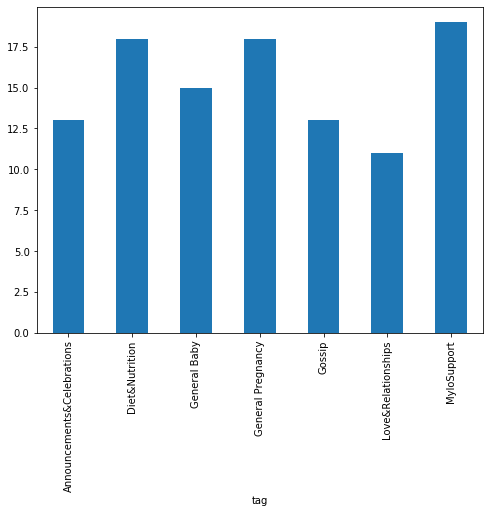

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
train.groupby('tag').question.count().plot.bar(ylim=0)
plt.show()

**Text Preprocessing and Cleaning**

In [10]:
nltk.download("stopwords")
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
train['question'] = train['question'].apply(clean_text)
test['question']= test['question'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
train['question'][:].apply(lambda x: str(TextBlob(x).correct()))
test['question'][:].apply(lambda x: str(TextBlob(x).correct()))

0                            unable unload profile pick
1     dont problem morning whole day got sleep a may...
2     hi confirmed pregnancy expecting baby month on...
3            best fresh fruit juice six months old baby
4     storage bag good store breast milk long time s...
5     mere rd march to and anniversary had mere husb...
6     in with week pregnant shall take colic acid ir...
7     hello today git know baby two cord neck do sai...
8     hello funds mere bet 4 months i had ab mere ra...
9            29 week one day ka matas with week started
10    lets discuss symptoms month pregnancymine glow...
11                                   nehal_shah1 babies
12    since morning feeling metallic taste tongue n ...
13    suffering gestational diabetes please share ve...
14    hello allay rat to mere mere husband se but la...
15    hey mommiees give baby cereals 2 times dayappl...
16    thank god give two new life lines lifemost pre...
17    his guy err alesha mere husband se late re

In [12]:
TextBlob(train['question'][1]).words

WordList(['breastfeeding', 'mother', 'ko', 'chai', 'pini', 'chaiye', 'usse', 'bache', 'ko', 'gas', 'hogi'])

In [13]:
st = PorterStemmer()
train['question'][:].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
test['question'][:].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                               unabl upload profil pic
1     dont problm morn whole day got sleep ya mai le...
2     hi conform pregnanc expect babi month one comp...
3              best fresh fruit juic six month old babi
4     storag bag good store breast milk long time so...
5     mera 3rd march ko 2nd anniversari hai mere hus...
6     im 10th week pregnant shall take folic acid ir...
7     hello today git know babi two cord neck doc sa...
8     hello frnd meri beti 4 month ki hai ab mere ha...
9             29 week one day ka matlab 30th week start
10    let discuss symptom 6month pregnancymin glow s...
11                                     nehal_shah1 babi
12    sinc morn feel metal tast tongu n pelvic pain ...
13    suffer gestat diabet pleas share veget juic sa...
14    hello allkal raat ko meri mere husband se bhut...
15    heya mommie give babi cerelac 2 time dayappl w...
16    thanku god give two new life line lifemost pre...
17    hii guyz yrr hamesha mere husband se ladt 

In [14]:
TextBlob(train['question'][0]).ngrams(2)      #bigrams

[WordList(['alhamdulilh', 'blessed']),
 WordList(['blessed', 'beautiful']),
 WordList(['beautiful', 'baby']),
 WordList(['baby', 'girl']),
 WordList(['girl', 'cesarean'])]

In [15]:
TextBlob(test['question'][0]).ngrams(2)  #bigrams

[WordList(['unable', 'upload']),
 WordList(['upload', 'profile']),
 WordList(['profile', 'pic'])]

In [16]:
import nltk
nltk.download('wordnet')
from textblob import Word
train['question'] = train['question'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) #lemmatization
train['question'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


0     alhamdulilh blessed beautiful baby girl cesarean
1    breastfeeding mother ko chai pini chaiye usse ...
2    hii preganent twin coming 27 feb dr suggest c ...
3    mujhy mild cramp sa feeling hai lower main aur...
4                                drink lion date syrup
Name: question, dtype: object

In [17]:
test['question'] = test['question'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
test['question'].head()

0                            unable upload profile pic
1    dont problm morning whole day got sleep ya mai...
2    hi conformed pregnancy expecting baby month on...
3            best fresh fruit juice six month old baby
4    storage bag good store breast milk long time s...
Name: question, dtype: object

In [18]:
train.head()

,post_id,question,user_stage,tag
0,1,alhamdulilh blessed beautiful baby girl cesarean,pregnant,Announcements&Celebrations
1,2,breastfeeding mother ko chai pini chaiye usse ...,mother,General Baby
2,3,hii preganent twin coming 27 feb dr suggest c ...,pregnant,General Pregnancy
3,4,mujhy mild cramp sa feeling hai lower main aur...,pregnant,General Pregnancy
4,5,drink lion date syrup,pregnant,Diet&Nutrition


In [19]:
train['question'].apply(lambda x: len(x.split(' '))).sum()

1967

**Train-test Split**

In [0]:
X = train.question
y = train.tag
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

**Classification**

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)



y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.48484848484848486


In [23]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)



y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.45454545454545453


**Prediction**

In [0]:
y_pred= sgd.predict(test['question'])

In [25]:
y_pred

array(['MyloSupport', 'General Pregnancy', 'Gossip', 'General Baby',
       'General Baby', 'Diet&Nutrition', 'General Pregnancy',
       'General Pregnancy', 'Diet&Nutrition', 'General Pregnancy',
       'General Pregnancy', 'General Baby', 'General Pregnancy',
       'Diet&Nutrition', 'Love&Relationships', 'General Baby',
       'Announcements&Celebrations', 'Love&Relationships',
       'Announcements&Celebrations', 'General Pregnancy',
       'General Pregnancy', 'MyloSupport', 'General Baby',
       'General Pregnancy', 'General Pregnancy', 'General Pregnancy',
       'Announcements&Celebrations', 'MyloSupport', 'General Pregnancy',
       'General Pregnancy', 'Love&Relationships', 'MyloSupport',
       'Announcements&Celebrations', 'MyloSupport'], dtype='<U26')

In [0]:
test['tag']= y_pred

In [27]:
test

,post_id,question,user_stage,tag
0,75,unable upload profile pic,pregnant,MyloSupport
1,90,dont problm morning whole day got sleep ya mai...,pregnant,General Pregnancy
2,94,hi conformed pregnancy expecting baby month on...,pregnant,Gossip
3,102,best fresh fruit juice six month old baby,mother,General Baby
4,108,storage bag good store breast milk long time s...,mother,General Baby
5,109,mera 3rd march ko 2nd anniversary hai mere hus...,ttc,Diet&Nutrition
6,112,im 10th week pregnant shall take folic acid ir...,pregnant,General Pregnancy
7,113,hello today git know baby two cord neck doc sa...,mother,General Pregnancy
8,114,hello frnds meri beti 4 month ki hai ab mere h...,mother,Diet&Nutrition
9,115,29 week one day ka matlab 30th week started,pregnant,General Pregnancy


In [0]:
test.to_csv("ruchika.jangir.met16.csv")

In [29]:
test.shape

(34, 4)